In [1]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
# merge
df = pd.concat([train_data, test_data], axis = 0)
df.rename(columns={'y':'target'},inplace=True)
df

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,target
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,4517,33,services,married,secondary,no,-333,yes,no,cellular,jul,329,5,-1,0,unknown,no
518,4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,153,1,-1,0,unknown,no
519,4519,57,technician,married,secondary,no,295,no,no,cellular,aug,151,11,-1,0,unknown,no
520,4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,129,4,211,3,other,no


In [2]:
def dataset_info(df):
    # Check if the input is a pandas DataFrame
    if isinstance(df, pd.DataFrame):
        # Count the total number of missing values in the DataFrame
        is_na = df.isna().sum().sum()
        # Print information about the DataFrame
        print("Datatype shape =", df.shape)
        print("Any null values =", is_na, "\n")
        
        # Get column names, data types, and unique values for each column
        col = df.columns
        datatype = df.dtypes
        uniq = df.nunique()
        
        # Print column-wise information
        print("\033[1m", "S.NO ", " Column", "  Datatype", "  Unique Data", "\n")
        for i in range(len(df.columns)):
            print("%d %10s %10s %10s" % (i + 1, col[i], datatype[i], uniq[i]))

In [3]:
dataset_info(df)

Datatype shape = (4521, 17)
Any null values = 0 

 S.NO   Column   Datatype   Unique Data 

1         id      int64       4521
2        age      int64         67
3        job     object         12
4    marital     object          3
5  education     object          4
6    default     object          2
7    balance      int64       2353
8    housing     object          2
9       loan     object          2
10    contact     object          3
11      month     object         12
12   duration      int64        875
13   campaign      int64         32
14      pdays      int64        292
15   previous      int64         24
16   poutcome     object          4
17     target     object          2


/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_3596/3010842282.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%d %10s %10s %10s" % (i + 1, col[i], datatype[i], uniq[i]))


In [4]:
# Identify and categorize columns with categorical data
catagorical_data = [j for j in df.columns if df[j].dtype == "O"]
print("Keys with categorical dataset are:", "\033[1m", catagorical_data)

# Identify and categorize columns with numerical data
num = [k for k in df.columns if df[k].dtype != "O"]
print("\033[0m", "Keys with numerical dataset are:", "\033[1m", num)

Keys with categorical dataset are:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'target']
 Keys with numerical dataset are:  ['id', 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [5]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

# Mapping 'no' to 0 and 'yes' to 1 in the 'target' column
df['target'] = df['target'].map({'no': 0, 'yes': 1})

# Separating features (X) and target variable (y)
x = df.drop(['target'], axis=1)
y = df['target']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

X_train_original = X_train
X_test_original = X_test

# Printing the shapes of the training and testing sets
print("Elements in X_train:", X_train.shape)
print("Elements in X_test:", X_test.shape)
print("Elements in Y_train:", Y_train.shape)
print("Elements in Y_test:", Y_test.shape)

Elements in X_train: (3616, 16)
Elements in X_test: (905, 16)
Elements in Y_train: (3616,)
Elements in Y_test: (905,)


In [6]:
X_train

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
3287,3288,30,admin.,single,secondary,no,127,yes,no,cellular,may,16,6,368,1,other
3356,3357,51,technician,married,secondary,no,500,yes,no,cellular,nov,26,6,-1,0,unknown
27,4027,32,self-employed,married,tertiary,no,3601,no,no,cellular,aug,171,15,-1,0,unknown
273,4273,50,technician,married,tertiary,no,199,yes,yes,cellular,feb,116,2,253,1,failure
136,4136,56,unemployed,divorced,primary,no,802,no,no,telephone,feb,258,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,3652,57,retired,married,tertiary,no,0,no,no,cellular,aug,116,4,-1,0,unknown
145,4145,29,blue-collar,married,secondary,no,358,no,no,cellular,jul,88,5,-1,0,unknown
1272,1273,35,technician,divorced,secondary,no,0,no,no,cellular,aug,124,4,-1,0,unknown
3652,3653,29,admin.,single,secondary,no,1070,yes,no,unknown,may,30,1,357,1,other


In [7]:
X_test

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
1043,1044,41,blue-collar,married,secondary,no,780,yes,no,cellular,may,432,3,-1,0,unknown
643,644,39,management,married,tertiary,no,2763,yes,no,unknown,jun,526,2,-1,0,unknown
3350,3351,31,admin.,married,secondary,no,389,yes,no,cellular,dec,69,1,185,2,failure
2156,2157,29,services,married,secondary,no,57,yes,no,telephone,jul,342,9,-1,0,unknown
2522,2523,59,blue-collar,divorced,secondary,no,3573,no,no,cellular,may,44,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,262,32,technician,single,secondary,no,0,no,no,cellular,aug,181,2,-1,0,unknown
159,160,34,technician,married,secondary,no,1641,yes,no,cellular,apr,380,1,-1,0,unknown
1434,1435,34,admin.,single,secondary,no,846,yes,no,cellular,apr,758,2,-1,0,unknown
3384,3385,35,admin.,single,secondary,no,847,yes,no,cellular,may,85,2,-1,0,unknown


In [8]:
import category_encoders as ce

# Specify categorical columns for encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize OrdinalEncoder
encoder = ce.OrdinalEncoder(cols=categorical_columns)

# Fit and transform the training set
X_train = encoder.fit_transform(X_train)

# Transform the test set using the encoder fitted on the training set
X_test = encoder.fit_transform(X_test)

# Display the column names in the encoded training set
X_train.keys
X_test.head()

/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/category_encoders/util

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
1043,1044,41,1,1,1,1,780,1,1,1,1,432,3,-1,0,1
643,644,39,2,1,2,1,2763,1,1,2,2,526,2,-1,0,1
3350,3351,31,3,1,1,1,389,1,1,1,3,69,1,185,2,2
2156,2157,29,4,1,1,1,57,1,1,3,4,342,9,-1,0,1
2522,2523,59,1,2,1,1,3573,2,1,1,1,44,1,-1,0,1


# Random Forest Algorithm

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate RandomForestClassifier
RF = RandomForestClassifier()

# Fit the model on the training set
RF.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = RF.predict(X_test)

# Calculate accuracy score
Accuracy = accuracy_score(Y_test, Y_pred)

# Calculate confusion matrix
conf = confusion_matrix(Y_test, Y_pred)

# Generate classification report
report = classification_report(Y_test, Y_pred)

# Print the results
print(f"Accuracy score of Random Forest Algorithm is {Accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{conf}\n")
print(f"Classification Report:\n{report}")

Accuracy score of Random Forest Algorithm is 87.51%
Confusion Matrix:
[[753  45]
 [ 68  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       798
           1       0.46      0.36      0.41       107

    accuracy                           0.88       905
   macro avg       0.69      0.65      0.67       905
weighted avg       0.86      0.88      0.87       905



remove less contributing attribute

In [10]:
f_score=pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=True)
f_score

default      0.003336
loan         0.009516
housing      0.017911
contact      0.020759
marital      0.026825
previous     0.028409
education    0.028720
campaign     0.038667
pdays        0.047766
job          0.047957
poutcome     0.059584
month        0.088382
id           0.100402
age          0.101469
balance      0.102485
duration     0.277813
dtype: float64

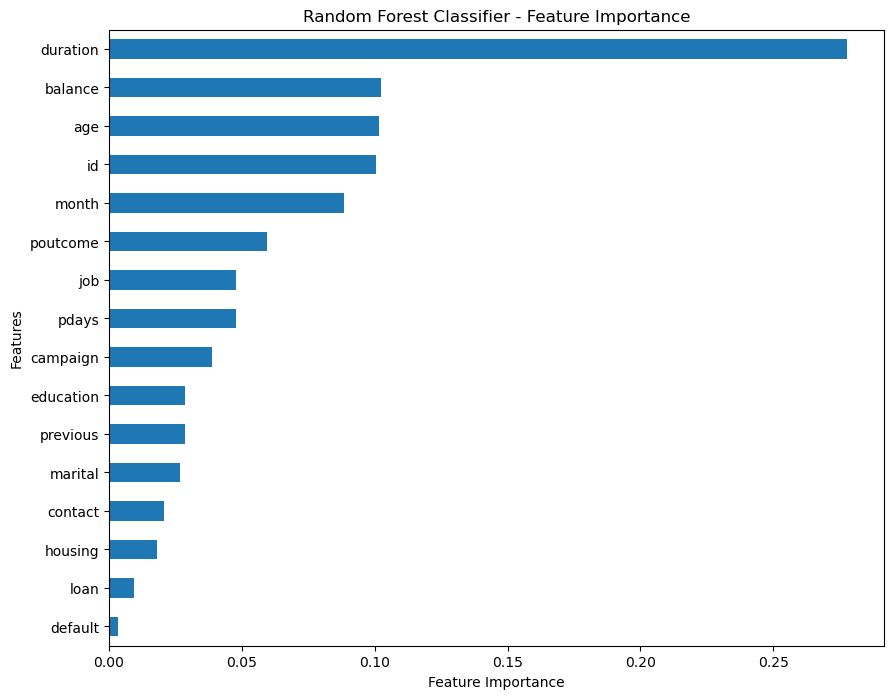

In [11]:
import matplotlib.pyplot as plt

# Plotting feature importances
f_score.plot(kind='barh', figsize=(10, 8))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()


remove outlier for scaling

In [12]:
from sklearn.preprocessing import StandardScaler

# Remove 'default' and 'loan' columns from training and testing sets
X_train = X_train.drop(columns=['default', 'loan'])
X_test = X_test.drop(columns=['default', 'loan'])

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate RandomForestClassifier with 1000 estimators
RF = RandomForestClassifier(n_estimators=1000)

# Fit the model on the modified and scaled training set
RF.fit(X_train_scaled, Y_train)

# Make predictions on the modified and scaled test set
Y_pred = RF.predict(X_test_scaled)

# Calculate accuracy score, confusion matrix, and classification report
Accuracy = accuracy_score(Y_test, Y_pred)
conf = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Print the results
print(f"Accuracy score of Random Forest Algorithm is {Accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{conf}\n")
print(f"Classification Report:\n{report}")

Accuracy score of Random Forest Algorithm is 88.07%
Confusion Matrix:
[[762  36]
 [ 72  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       798
           1       0.49      0.33      0.39       107

    accuracy                           0.88       905
   macro avg       0.70      0.64      0.66       905
weighted avg       0.86      0.88      0.87       905



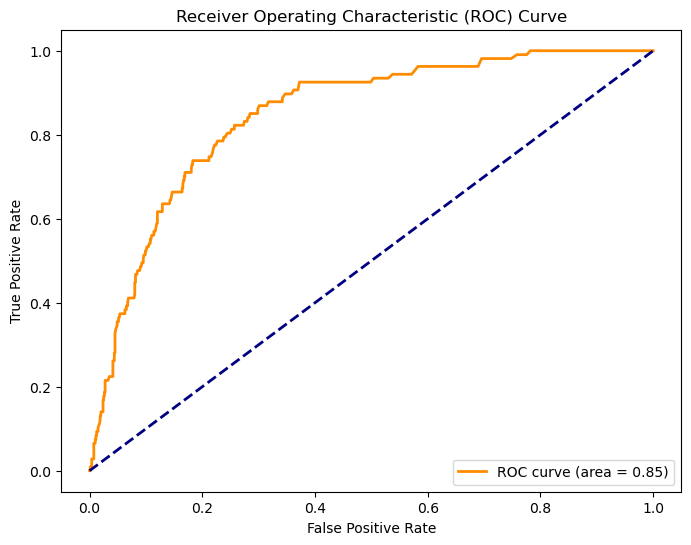

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = RF.predict_proba(X_test_scaled)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=y_pred_proba)

# Calculate ROC-AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [14]:
y_pred_proba

array([0.124, 0.221, 0.014, 0.134, 0.102, 0.129, 0.087, 0.041, 0.107,
       0.412, 0.379, 0.072, 0.094, 0.5  , 0.513, 0.1  , 0.107, 0.053,
       0.316, 0.419, 0.225, 0.088, 0.036, 0.451, 0.054, 0.11 , 0.454,
       0.145, 0.499, 0.058, 0.129, 0.086, 0.127, 0.011, 0.502, 0.047,
       0.448, 0.148, 0.098, 0.477, 0.023, 0.176, 0.321, 0.047, 0.157,
       0.099, 0.057, 0.141, 0.12 , 0.068, 0.259, 0.17 , 0.022, 0.084,
       0.303, 0.177, 0.035, 0.056, 0.036, 0.51 , 0.066, 0.06 , 0.098,
       0.115, 0.133, 0.074, 0.015, 0.101, 0.066, 0.531, 0.106, 0.137,
       0.226, 0.127, 0.099, 0.061, 0.104, 0.033, 0.28 , 0.126, 0.066,
       0.058, 0.027, 0.294, 0.476, 0.107, 0.046, 0.134, 0.032, 0.116,
       0.221, 0.052, 0.13 , 0.101, 0.304, 0.193, 0.211, 0.233, 0.544,
       0.131, 0.5  , 0.262, 0.148, 0.158, 0.162, 0.087, 0.018, 0.133,
       0.478, 0.061, 0.091, 0.306, 0.544, 0.381, 0.263, 0.237, 0.124,
       0.193, 0.189, 0.3  , 0.223, 0.09 , 0.053, 0.06 , 0.118, 0.044,
       0.55 , 0.036,

In [15]:
import numpy as np

# Assuming y_pred_proba is a NumPy array or can be converted to one
y_pred_proba = 1 - np.array(y_pred_proba)

# Round the values to 3 decimals
y_pred_proba = np.round(y_pred_proba, 3)

In [16]:
y_pred_proba

array([0.876, 0.779, 0.986, 0.866, 0.898, 0.871, 0.913, 0.959, 0.893,
       0.588, 0.621, 0.928, 0.906, 0.5  , 0.487, 0.9  , 0.893, 0.947,
       0.684, 0.581, 0.775, 0.912, 0.964, 0.549, 0.946, 0.89 , 0.546,
       0.855, 0.501, 0.942, 0.871, 0.914, 0.873, 0.989, 0.498, 0.953,
       0.552, 0.852, 0.902, 0.523, 0.977, 0.824, 0.679, 0.953, 0.843,
       0.901, 0.943, 0.859, 0.88 , 0.932, 0.741, 0.83 , 0.978, 0.916,
       0.697, 0.823, 0.965, 0.944, 0.964, 0.49 , 0.934, 0.94 , 0.902,
       0.885, 0.867, 0.926, 0.985, 0.899, 0.934, 0.469, 0.894, 0.863,
       0.774, 0.873, 0.901, 0.939, 0.896, 0.967, 0.72 , 0.874, 0.934,
       0.942, 0.973, 0.706, 0.524, 0.893, 0.954, 0.866, 0.968, 0.884,
       0.779, 0.948, 0.87 , 0.899, 0.696, 0.807, 0.789, 0.767, 0.456,
       0.869, 0.5  , 0.738, 0.852, 0.842, 0.838, 0.913, 0.982, 0.867,
       0.522, 0.939, 0.909, 0.694, 0.456, 0.619, 0.737, 0.763, 0.876,
       0.807, 0.811, 0.7  , 0.777, 0.91 , 0.947, 0.94 , 0.882, 0.956,
       0.45 , 0.964,

In [17]:
# Create a DataFrame with 'id' and 'y' columns
result_df = pd.DataFrame({'id': X_test['id'], 'y': y_pred_proba})

# Sort the DataFrame by ascending 'id'
result_df = result_df.sort_values(by='id', ascending=True)

# Save the DataFrame to a CSV file
result_df.to_csv('predictions_randomforest.csv', index=False, header=['id', 'y'])

# KNN Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)

Y_predicted=KNN.predict(X_test)

print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted)*100} ")

accuracy of the model is 87.29281767955801 


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,Y_train)

Y_predicted=log.predict(X_test)

print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted)*100} ")

accuracy of the model is 87.73480662983425 


/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Support Vector Machine (SVM)

In [20]:
from sklearn.svm import SVC

# Instantiate SVM classifier
svm_model = SVC(probability=True)

# Fit the model on the training set
svm_model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
Y_predicted_svm = svm_model.predict(X_test)

# Calculate accuracy score
accuracy_svm = accuracy_score(Y_test, Y_predicted_svm)

# Print the accuracy
print(f"Accuracy of the SVM model is {accuracy_svm * 100:.2f}%")


Accuracy of the SVM model is 88.18%


/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [21]:
# Y_predicted_svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# # Assuming y_pred_proba is a NumPy array or can be converted to one
# Y_predicted_svm_proba = 1 - np.array(Y_predicted_svm_proba)

# # Round the values to 3 decimals
# Y_predicted_svm_proba = np.round(y_pred_proba, 3)

In [22]:
# # Create a DataFrame with 'id' and 'y' columns
# result2_df = pd.DataFrame({'id': X_test['id'], 'y': Y_predicted_svm_proba})

# # Sort the DataFrame by ascending 'id'
# result2_df = result2_df.sort_values(by='id', ascending=True)

# # Save the DataFrame to a CSV file
# result2_df.to_csv('predictions_svm.csv', index=False, header=['id', 'y'])

# XGBoots

In [23]:
import xgboost as xgb

# Instantiate XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training set
xgb_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_predicted_xgb = xgb_model.predict(X_test)

# Calculate accuracy score
accuracy_xgb = accuracy_score(Y_test, Y_predicted_xgb)

# Print the accuracy
print(f"Accuracy of the XGBoost model is {accuracy_xgb * 100:.2f}%")


Accuracy of the XGBoost model is 87.18%


/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Fit the model on the training set
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_predicted_dt = dt_model.predict(X_test)

# Calculate accuracy score
accuracy_dt = accuracy_score(Y_test, Y_predicted_dt)

# Print the accuracy
print(f"Accuracy of the Decision Tree model is {accuracy_dt * 100:.2f}%")

# Optionally, you can print other evaluation metrics like confusion matrix and classification report
conf_dt = confusion_matrix(Y_test, Y_predicted_dt)
report_dt = classification_report(Y_test, Y_predicted_dt)

print(f"Confusion Matrix:\n{conf_dt}\n")
print(f"Classification Report:\n{report_dt}")


Accuracy of the Decision Tree model is 75.91%
Confusion Matrix:
[[642 156]
 [ 62  45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       798
           1       0.22      0.42      0.29       107

    accuracy                           0.76       905
   macro avg       0.57      0.61      0.57       905
weighted avg       0.83      0.76      0.79       905

